In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

# plot
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import random
import numpy as np

import math

In [2]:
# def functions
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [339]:
# # read data
# train = pd.read_csv("ProjectTrainingData.csv")
# test = pd.read_csv("ProjectTestData.csv")

# train.columns

# print(min(test.hour))
# print(max(test.hour))

# print(train.shape)
# print(test.shape)

In [3]:
sample = pd.read_csv('sample.csv')

# 1 1000000 Sample

In [6]:
# take 1000000 samples
# sample = train.sample(1000000, random_state = 613)

print(sample.click.value_counts())
print(len(sample[sample.click == 1])/len(sample)) # 17%

# get date of sample
sample['date'] = round((sample.hour - 14100000)/100).astype('int')

# get hour of sample
sample.hour = sample.hour - 14100000 - sample.date * 100

print(sample.columns) # can treat hour and date as continuous variables, but now let's just make it categorical

for i in range(2, 25):
        sample.iloc[:, i] = sample.iloc[:, i].astype('category') # change to categorical variables
sample = sample.iloc[:, 1:] # delete id

for cat_var in sample.columns:
    print(cat_var, sample[cat_var].nunique())

print(sample.columns[[10, 11]])

sample.drop(['device_id', 'device_ip'], axis = 1, inplace = True) # so many categories, drop these two variables for now

0    829194
1    170806
Name: click, dtype: int64
0.170806
Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'date'],
      dtype='object')
click 2
hour 24
C1 7
banner_pos 7
site_id 2647
site_domain 2888
site_category 23
app_id 3184
app_domain 194
app_category 26
device_id 151890
device_ip 546929
device_model 5156
device_type 4
device_conn_type 4
C14 2114
C15 8
C16 9
C17 396
C18 4
C19 65
C20 162
C21 55
date 9
Index(['device_id', 'device_ip'], dtype='object')


In [252]:
# not sure need to be the same or not?
# for i in range(0,23):
#     X_test = X_test[X_test[X_test.columns[i]].isin(X_train.iloc[:,i])]

# len(X_test)
# y_test = y_test[X_test.index]

In [7]:
from sklearn.model_selection import train_test_split

# Split validation
X_train, X_test, y_train, y_test = train_test_split(
    sample.iloc[:, 1:], sample['click'], test_size = 0.4, random_state = 613, stratify = sample['click'])

In [8]:
from sklearn import preprocessing
X_train_ordinal = X_train.values
X_test_ordinal = X_test.values
les = []

for i in range(X_train_ordinal.shape[1]):
    le = preprocessing.LabelEncoder()
    le.fit(sample.iloc[:,1:].iloc[:, i])
    les.append(le)
    X_train_ordinal[:, i] = le.transform(X_train_ordinal[:, i])
    X_test_ordinal[:, i] = le.transform(X_test_ordinal[:, i])

## 1.1 Tree

### 1.1.1 No Tuning

In [ ]:
# X_test and y_test are indeed validation data
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

random.seed(613)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_ordinal, y_train)

# predict 
y_pred = clf.predict(X_test_ordinal)

Confusion matrix, without normalization
[[286233  45445]
 [ 50058  18264]]
Normalized confusion matrix
[[0.86 0.14]
 [0.73 0.27]]


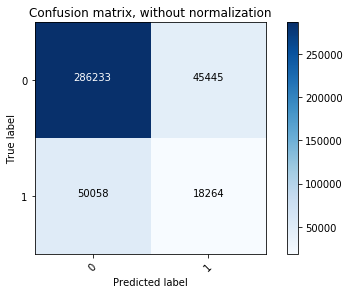

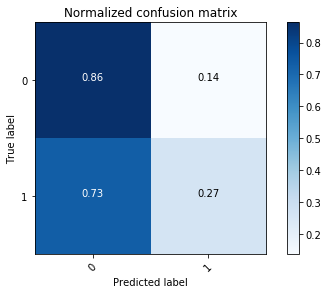

Accuracy (out-of-sample): 0.76
F1 score (out-of-sample):  0.5668435505273667
Kappa score (out-of-sample):  0.13389608103925177
Classification report:                precision    recall  f1-score   support

           0       0.85      0.86      0.86    331678
           1       0.29      0.27      0.28     68322

   micro avg       0.76      0.76      0.76    400000
   macro avg       0.57      0.57      0.57    400000
weighted avg       0.75      0.76      0.76    400000

AUC:  0.5651534833037332
Log loss:  7.606736770260194


In [379]:
import itertools
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report
from sklearn.metrics import log_loss
    
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Accuracy
print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred))

# F1 score
print('F1 score (out-of-sample): ', f1_score(y_test, y_pred, average='macro'))

# Kappa score
print('Kappa score (out-of-sample): ', cohen_kappa_score(y_test, y_pred))

# Build a text report showing the main classification metrics (out-of-sample performance)
print('Classification report: ',classification_report(y_test, y_pred, target_names=['0', '1']))

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC: ', roc_auc)

y_pred_prob = clf.predict_proba(X_test_ordinal)

print('Log loss: ', log_loss(y_test, y_pred_prob))

In [381]:
# naive score
log_loss_naive = log_loss(y_test, np.repeat(0.17, len(y_test)))
log_loss_naive # 0.4571626429765626

0.4571626429746694

(array([336291.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  63709.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

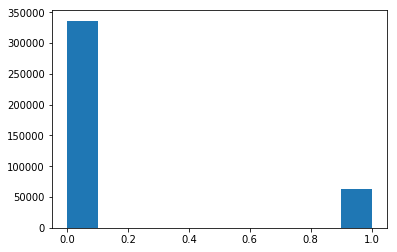

In [382]:
plt.hist(y_pred)

### 1.1.2 Tune Max_depth for Trees

In [384]:
# Tunning max_depth

max_depths = range(5, 20, 1)
test_results = []
accuracy = []

for max_depth in max_depths:
    clf_max_depth = DecisionTreeClassifier(max_depth=max_depth)
    clf_max_depth.fit(X_train_ordinal, y_train)
    
    max_depth_pred = clf_max_depth.predict_proba(X_test_ordinal)
    y_pred = clf_max_depth.predict(X_test_ordinal)
        
    score_log_loss = log_loss(y_test, max_depth_pred)
    accuracy.append(accuracy_score(y_test, y_pred))
    test_results.append(score_log_loss)

print(max_depths[test_results.index(min(test_results))])

8


In [311]:
# Tunning max_depth and min_samples_leaf

from sklearn.model_selection import GridSearchCV #http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

np.random.seed(613)
gs_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=613),
                  param_grid=[{'max_depth': range(10, 25, 3), 
                              'min_samples_leaf':range(250, 500, 50)
                               # ,'min_samples_split':[2,3,4,5]
                              }],
                  scoring='neg_log_loss',
                  cv=5,
                  n_jobs=4)

gs_dt = gs_dt.fit(X_train,y_train)
print(gs_dt.best_score_)
print(gs_dt.best_params_)

-0.41092979394390444
{'max_depth': 16, 'min_samples_leaf': 350}


In [386]:
clf_gs_1 = DecisionTreeClassifier(max_depth=16,
                              criterion='gini',
                              min_samples_leaf=350,
                              # min_samples_split=2,
                              random_state=613)

clf_gs_1 = clf_gs_1.fit(X_train_ordinal, y_train)
y_pred = clf_gs_1.predict(X_test_ordinal)
y_pred_prob = clf_gs_1.predict_proba(X_test_ordinal)

Confusion matrix, without normalization
[[328632   3046]
 [ 64123   4199]]
Normalized confusion matrix
[[0.99 0.01]
 [0.94 0.06]]


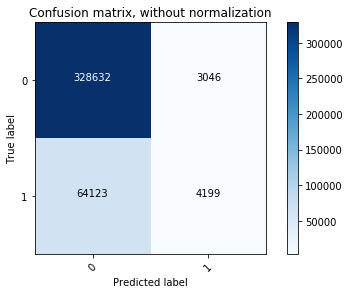

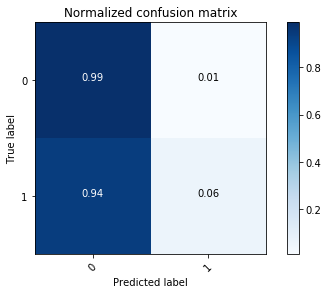

Accuracy (out-of-sample): 0.83
F1 score (out-of-sample):  0.5092068785347347
Kappa score (out-of-sample):  0.08103530713614115
Classification report:                precision    recall  f1-score   support

           0       0.84      0.99      0.91    331678
           1       0.58      0.06      0.11     68322

   micro avg       0.83      0.83      0.83    400000
   macro avg       0.71      0.53      0.51    400000
weighted avg       0.79      0.83      0.77    400000

AUC:  0.5261376839485526
Log loss:  0.4103608666309763


In [390]:
import itertools
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report
from sklearn.metrics import log_loss
    
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Accuracy
print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred))

# F1 score
print('F1 score (out-of-sample): ', f1_score(y_test, y_pred, average='macro'))

# Kappa score
print('Kappa score (out-of-sample): ', cohen_kappa_score(y_test, y_pred))

# Build a text report showing the main classification metrics (out-of-sample performance)
print('Classification report: ',classification_report(y_test, y_pred, target_names=['0', '1']))

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC: ', roc_auc)

print('Log loss: ', log_loss(y_test, y_pred_prob))

## 1.2 Random Forest

In [13]:
# Tuning max_depth

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report

max_depths = range(20, 100, 20)
test_results = []
accuracy = []

for max_depth in max_depths:
    clf_max_depth = RandomForestClassifier(n_estimators = 25, max_depth = max_depth, max_features = 0.3)
    clf_max_depth.fit(X_train_ordinal, y_train)
    
    max_depth_pred = clf_max_depth.predict_proba(X_test_ordinal)
    y_pred = clf_max_depth.predict(X_test_ordinal)

    score_log_loss = log_loss(y_test, max_depth_pred)
    accuracy.append(accuracy_score(y_test, y_pred))
    test_results.append(score_log_loss)
    
print(max_depths[test_results.index(min(test_results))])

20


In [410]:
# Tuning min_samples_split

min_samples_splits = range(50, 250, 50)
test_results = []
accuracy = []

for min_samples_split in min_samples_splits:
    clf_min_samples_split = RandomForestClassifier(n_estimators = 25, max_depth = 20, min_samples_split = min_samples_split, max_features = 0.3)
    clf_min_samples_split.fit(X_train_ordinal, y_train)
    
    min_samples_split_pred = clf_min_samples_split.predict_proba(X_test_ordinal)
    y_pred = clf_min_samples_split.predict(X_test_ordinal)

    score_log_loss = log_loss(y_test, min_samples_split_pred)
    accuracy.append(accuracy_score(y_test, y_pred))
    test_results.append(score_log_loss)
    
print(min_samples_splits[test_results.index(min(test_results))])

150


In [21]:
# Tuning min_samples_leaf

min_samples_leafs = range(10, 125, 25)
test_results = []
accuracy = []

for min_samples_leaf in min_samples_leafs:
    clf_min_samples_leaf = RandomForestClassifier(n_estimators = 25, max_depth = 20, min_samples_split = 150, min_samples_leaf = min_samples_leaf, max_features = 0.3)
    clf_min_samples_leaf.fit(X_train_ordinal, y_train)
    
    min_samples_leaf_pred = clf_min_samples_leaf.predict_proba(X_test_ordinal)
    y_pred = clf_min_samples_leaf.predict(X_test_ordinal)

    score_log_loss = log_loss(y_test, min_samples_leaf_pred)
    accuracy.append(accuracy_score(y_test, y_pred))
    test_results.append(score_log_loss)
    
print(min_samples_leafs[test_results.index(min(test_results))])

10


In [22]:
test_results

[0.40156920842662397,
 0.40205598760263483,
 0.4028447232282396,
 0.40350201698386484,
 0.40415422036166215]

RF feature importance:  [(0.1264, 'site_id'), (0.0889, 'site_domain'), (0.0887, 'C21'), (0.0886, 'C16'), (0.0797, 'C14'), (0.0704, 'device_model'), (0.051, 'site_category'), (0.0495, 'hour'), (0.044, 'C17'), (0.0439, 'app_id'), (0.0374, 'C20'), (0.0353, 'C15'), (0.0335, 'C19'), (0.0303, 'date'), (0.0278, 'app_category'), (0.0243, 'app_domain'), (0.0229, 'C18'), (0.0183, 'banner_pos'), (0.0147, 'device_conn_type'), (0.0135, 'C1'), (0.0106, 'device_type')]
Confusion matrix, without normalization
[[328536   3142]
 [ 63439   4883]]
Normalized confusion matrix
[[0.99 0.01]
 [0.93 0.07]]


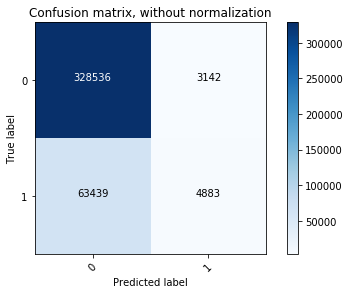

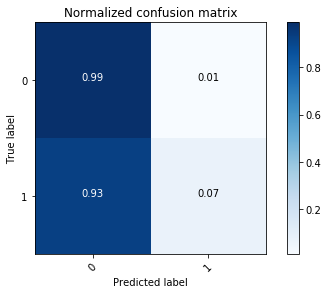

Accuracy (out-of-sample): 0.83
F1 score (out-of-sample):  0.517954579139031
Kappa score (out-of-sample):  0.0954354245134521
Classification report:                precision    recall  f1-score   support

           0       0.84      0.99      0.91    331678
           1       0.61      0.07      0.13     68322

   micro avg       0.83      0.83      0.83    400000
   macro avg       0.72      0.53      0.52    400000
weighted avg       0.80      0.83      0.77    400000

AUC:  0.5309986735394325
Log loss:  0.401495990105962


In [23]:
from sklearn.ensemble import RandomForestClassifier
import itertools
import sklearn
from sklearn.metrics import confusion_matrix

randomForest = RandomForestClassifier(max_depth = 20, n_estimators = 25, min_samples_split = 150, min_samples_leaf = 10, max_features=0.3)

np.random.seed(613)
randomForest.fit(X_train_ordinal, y_train)

# Feature Importance
names = sample.columns[1:]
print('RF feature importance: ', sorted(zip(map(lambda x: round(x, 4), randomForest.feature_importances_), names), 
             reverse=True))

y_pred = randomForest.predict(X_test_ordinal)
y_pred_prob = randomForest.predict_proba(X_test_ordinal)

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Accuracy
print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred))

# F1 score
print('F1 score (out-of-sample): ', f1_score(y_test, y_pred, average='macro'))

# Kappa score
print('Kappa score (out-of-sample): ', cohen_kappa_score(y_test, y_pred))

# Build a text report showing the main classification metrics (out-of-sample performance)
print('Classification report: ',classification_report(y_test, y_pred, target_names=['0', '1']))

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC: ', roc_auc)

print('Log loss: ', log_loss(y_test, y_pred_prob))